## Homework instructions

First, this is is the sentiment analyzer tool from this week's video https://github.com/shangeth/NLTK-Twitter-Sentiment-Analysis . When combined with this flask boilerplate login example, a working app for users can be made https://github.com/alectrocute/flaskSaaS 

Homework

The homework for this week is to build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

Step 1 - Go to Yahoo Finance and find a stock price that you want to predict. Click on historical data, then download the CSV of that stocks price history https://finance.yahoo.com/quote/AAPL/history?p=AAPL  

Step 2 - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

This is also a helpful example - https://medium.com/@randerson112358/predict-stock-prices-using-python-machine-learning-53aa024da20a

Step 3 - Visualize your result using matplotlib or another plotting library of your choice

Once your code is complete, upload it to GitHub and send the github link to gradedhomeworkassignments@gmail.com with your full name as the subject line.  Good luck!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
import math
from sklearn import preprocessing

### Step 1 - Go to Yahoo Finance and find a stock price to predict. 

In [2]:
import pandas_datareader.data as web
import yfinance as yf

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)
df = web.DataReader("AZN", 'yahoo', start, end)

df.to_csv('AZN.csv')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,23.764999,23.575001,23.709999,23.705000,2606200.0,10.262468
2010-01-05,23.465000,23.150000,23.434999,23.225000,2666600.0,10.054667
2010-01-06,23.045000,22.785000,22.915001,23.040001,3020800.0,9.974573
2010-01-07,23.325001,23.120001,23.250000,23.290001,4454600.0,10.082803
2010-01-08,23.415001,23.174999,23.270000,23.389999,2675600.0,10.126096


In [8]:
#df = pd.read_csv('AZN.csv')

In [3]:
df.iloc[-1]

High         2.863000e+01
Low          2.797000e+01
Open         2.847000e+01
Close        2.818000e+01
Volume       7.149700e+06
Adj Close    2.498489e+01
Name: 2017-01-11 00:00:00, dtype: float64

Step 2 - Use Scikit learn to try out 3 different types of regression models to predict the price of that stock for a future date. See this https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7  as an example and the scikit learn docs to see all the different types of regression models you can easily build (i.e quadratic, linear, lasso, ridge, etc.)

Feature Engineering

In [4]:
dfreg = df.loc[:,['Adj Close', 'Volume']]
#high low percentage
dfreg['HL_PCT'] = (df['High'] - df['Low'])/df['Close'] * 100.0
#close open percentage change
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

Pre-processing & Cross Validation

In [5]:
#Drop Missing value
dfreg.fillna(value=-99999, inplace=True)

In [6]:
#set a variable for predicting 'n' days out into the future
forecast_out = int(math.ceil(0.01 * len(dfreg)))
forecast_out #'n=5' days

18

In [7]:
forecast_col = 'Adj Close'
#create another column for target shifted n units up. Note that this is the prediction.
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
dfreg.head(20)

,Adj Close,Volume,HL_PCT,PCT_change,label
Date,,,,,
2010-01-04,10.262468,2606200.0,0.801513,-0.021085,10.063323
2010-01-05,10.054667,2666600.0,1.356299,-0.896092,10.139085
2010-01-06,9.974573,3020800.0,1.128473,0.545494,10.145579
2010-01-07,10.082803,4454600.0,0.880206,0.172047,10.502835
2010-01-08,10.126096,2675600.0,1.026087,0.515681,10.234306
2010-01-11,10.307923,4584000.0,0.944983,0.337126,10.052179
2010-01-12,10.260305,3153200.0,0.696206,0.317464,10.070859
2010-01-13,10.500577,4653000.0,1.175015,0.434781,10.299688
2010-01-14,10.691060,5256200.0,0.688399,0.243554,10.269336


In [8]:
#dropping the label column above, as it's what we want to predict.
# convert the datagram to a numpy array
X = np.array(dfreg.drop(['label'], 1))
#scale all values in X so that everyoe can have the same distribution for linear regression
X = preprocessing.scale(X)

In [9]:
# find data series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
# remove the last '5' rows. 
# We've shifted the prediction/label up by 5 rows, so there won't be any prediction/label for the corresponding X value.
# new X dataframe below
X = X[:-forecast_out]

# separate label and identify it as y
y = np.array(dfreg['label'])

# get all of the y values except the last '5' days/rows
y = y[:-forecast_out]

Reminder about index slicing

test = [1,2,3,4,5,6,7,8,9,10,11]

test[-5:] returns [7, 8, 9, 10, 11]

test[:-5] returns [1, 2, 3, 4, 5, 6]

### Step 2 - Use Scikit learn to try out 3 different types of regression models

#### Split the training and testing set

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [12]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linear = LinearRegression(n_jobs=-1)
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.969146002243363

In [13]:
from sklearn.pipeline import make_pipeline
# Quadratic Regression
quadratic = make_pipeline(PolynomialFeatures(2), Ridge())
quadratic.fit(X_train, y_train)
quadratic.score(X_test, y_test)

0.9721940638145077

In [14]:
#SVM
from sklearn.svm import SVR
# Create and train the Support Vector Machine (Regressor) 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr_rbf.fit(X_train, y_train)
svr_rbf.score(X_test, y_test)

0.971396726162326

In [15]:
# KNN Regression
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9594433411958239

KNN return the best confidence

In [21]:
forecast_set = knn.predict(X_lately)
dfreg['Forecast'] = np.nan
forecast_set

array([25.43600655, 26.79074097, 25.70425129, 27.29225731, 25.26488304,
       25.26488304, 23.64020729, 26.30918026, 27.57673931, 25.63548374,
       25.06874084, 27.67829323, 28.93565273, 26.82268143, 28.56445217,
       28.93565273, 28.78145981, 25.90081978])

In [22]:
dfreg.tail()

,Adj Close,Volume,HL_PCT,PCT_change,label,Forecast
Date,,,,,,
2017-01-25,NaN,NaN,NaN,NaN,26.822681,NaN
2017-01-26,NaN,NaN,NaN,NaN,28.564452,NaN
2017-01-27,NaN,NaN,NaN,NaN,28.935653,NaN
2017-01-28,NaN,NaN,NaN,NaN,28.781460,NaN
2017-01-29,NaN,NaN,NaN,NaN,25.900820,NaN


### Step 3: Visulize the prediction results

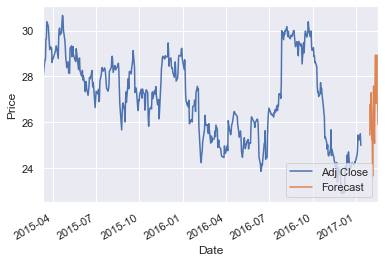

In [23]:
import datetime

last_date = dfreg.iloc[-1].name #returns Timestamp('2017-01-11')
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1) #returns Timestamp('2017-01-30 00:00:00')

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()